# WITH PANDAS AND MATPLOTLIB

In [244]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 150
pd.options.display.max_columns = 100

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [245]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [246]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.000,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.000,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.000,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.000,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.000,M,H,Evans,CO,False,attack,Not fleeing,False


In [247]:
# with matplotlib
genders=kill.groupby("gender").sum().index
genders

Index(['F', 'M'], dtype='object', name='gender')

In [248]:
total= kill.groupby("gender")["gender"].value_counts().values
total

array([ 107, 2428])

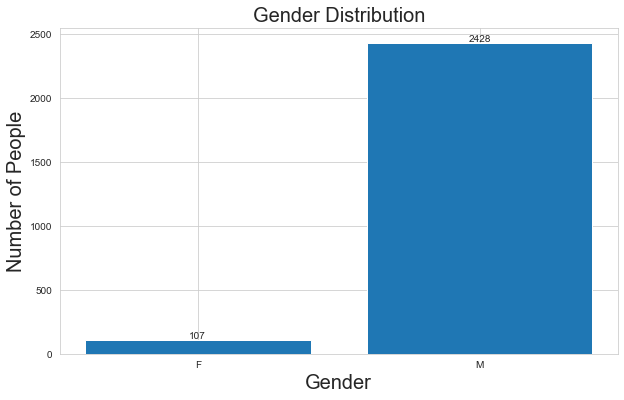

In [249]:
fig, ax = plt.subplots()
plt.title('Gender Distribution',{"size":20})
plt.xlabel('Gender',{"size":20})
plt.ylabel("Number of People",{"size":20})

for i in range(len(genders)):
    plt.text(i,total[i],total[i], ha="center", va="bottom")
ax.bar(genders,total);

## 2: Plot 7 most common kill weapons

In [250]:
kill["armed"].value_counts().head(7)

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

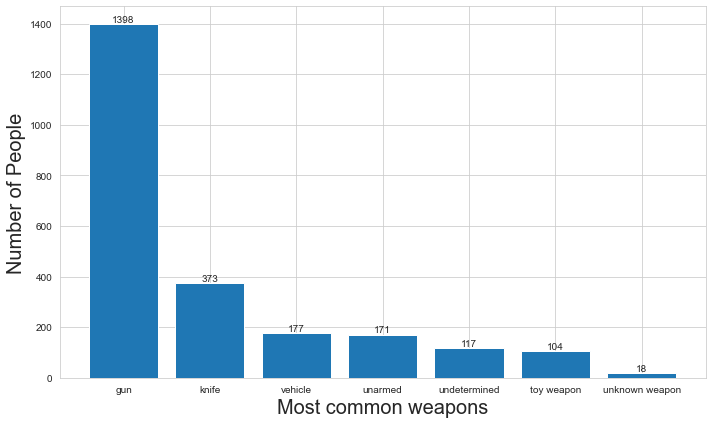

In [251]:
# with matplotlib
weapons = kill["armed"].value_counts().head(7).index
num_people = kill["armed"].value_counts().head(7).values

fig, ax = plt.subplots()
plt.xlabel('Most common weapons',{"size":20})
plt.ylabel("Number of People",{"size":20})

for i in range(len(weapons)):
    plt.text(i,num_people[i],num_people[i], ha="center", va="bottom")
ax.bar(weapons,num_people);
plt.tight_layout()

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [253]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.000,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.000,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.000,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.000,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.000,M,H,Evans,CO,False,attack,Not fleeing,False


In [254]:
def conditions(u):
    if(u["age"]>25.000):
        return "above25"
    else:
        return "under25"


In [256]:
kill["age_cat"]=kill.apply(conditions,axis=1)
kill

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.000,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.000,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.000,M,H,Wichita,KS,False,other,Not fleeing,False,under25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.000,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.000,M,H,Evans,CO,False,attack,Not fleeing,False,above25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.000,M,NaN,Kansas City,MO,False,attack,Not fleeing,False,above25
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False,under25
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.000,M,NaN,Melba,ID,False,attack,Car,False,above25
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.000,M,B,Oshkosh,WI,False,attack,Car,True,above25


In [257]:
kill["age_cat"].value_counts()

above25    1905
under25     630
Name: age_cat, dtype: int64

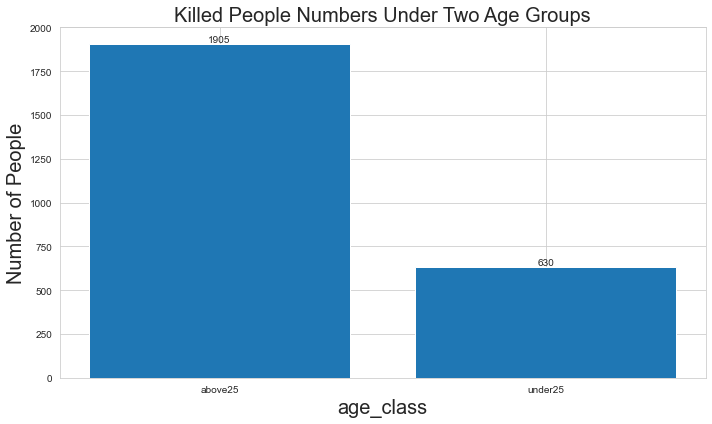

In [258]:
# with matplotlib
age_class = kill["age_cat"].value_counts().index
num_people = kill["age_cat"].value_counts().values

fig, ax = plt.subplots()
plt.xlabel('age_class',{"size":20})
plt.ylabel("Number of People",{"size":20})
plt.title("Killed People Numbers Under Two Age Groups",{"size":20})

for i in range(len(age_class)):
    plt.text(i,num_people[i],num_people[i], ha="center", va="bottom")
ax.bar(age_class,num_people);
plt.tight_layout()

## 4: Plot number of killed poeple by race

In [259]:
race_num = kill.race.value_counts()
race_num

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

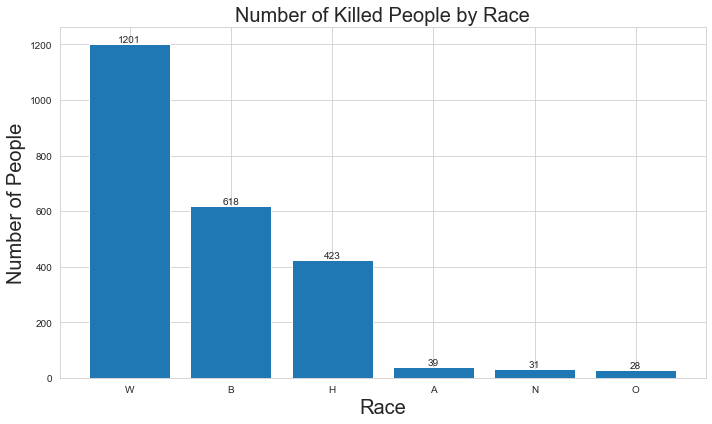

In [260]:
# with matplotlib
race = race_num.index
num_race = race_num.values

fig, ax = plt.subplots()
plt.xlabel('Race',{"size":20})
plt.ylabel("Number of People",{"size":20})
plt.title("Number of Killed People by Race",{"size":20})

for i in range(len(race)):
    plt.text(i,num_race[i],num_race[i], ha="center", va="bottom")
ax.bar(race,num_race);
plt.tight_layout()

## 5: Killed People According to Races (Pie Chart)

In [261]:
kill.shape

(2535, 15)

In [262]:
kill.race.value_counts().index

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [263]:
missing_values = np.where(kill["race"].isna()==True)[0]
missing_values

array([  59,  241,  266,  340,  398,  417,  426,  470,  518,  537,  560,
        569,  592,  598,  687,  723,  749,  756,  759,  774,  784,  802,
        924,  928,  936,  967,  973,  989, 1071, 1090, 1164, 1207, 1329,
       1343, 1376, 1382, 1385, 1397, 1404, 1419, 1442, 1447, 1461, 1470,
       1500, 1561, 1575, 1625, 1630, 1636, 1637, 1648, 1654, 1660, 1675,
       1682, 1739, 1743, 1752, 1758, 1769, 1794, 1802, 1803, 1809, 1825,
       1828, 1831, 1836, 1842, 1846, 1859, 1882, 1893, 1894, 1911, 1919,
       1921, 1922, 1924, 1926, 1927, 1932, 1933, 1936, 1940, 1942, 1946,
       1947, 1949, 1950, 2039, 2078, 2091, 2106, 2128, 2145, 2161, 2195,
       2222, 2238, 2240, 2244, 2247, 2267, 2271, 2285, 2292, 2297, 2307,
       2326, 2327, 2330, 2350, 2353, 2354, 2356, 2359, 2378, 2391, 2408,
       2410, 2412, 2413, 2418, 2419, 2424, 2426, 2429, 2435, 2436, 2437,
       2438, 2441, 2442, 2443, 2444, 2445, 2449, 2450, 2451, 2452, 2453,
       2454, 2455, 2456, 2458, 2459, 2460, 2463, 24

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [264]:
kill.drop(missing_values, inplace=True)

In [265]:
kill.shape # we have checked "race" column and drop missing values only on "race" column

(2340, 15)

In [266]:
kill.dropna(inplace=True) #all missing values are dropped on all columns
kill.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [287]:
y = kill.race.value_counts()
y

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [281]:
my_labels= kill.race.value_counts().index
my_labels

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

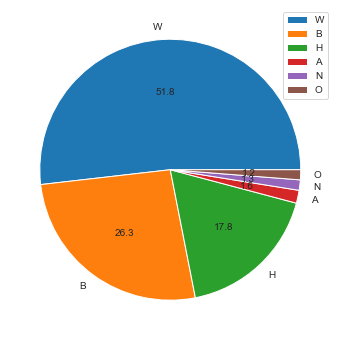

In [288]:
# matplotlib
plt.pie(y, labels=my_labels, autopct="%.1f" )
plt.legend()
plt.show;
